### 1.Following Given instructions and reporting the performance changes

In [1]:
# Simple CNN model for CIFAR-10
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as k
k.common.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


In [4]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
# Compile model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

In [6]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 445s 9ms/step - loss: 1.9303 - accuracy: 0.2853 - val_loss: 1.7737 - val_accuracy: 0.3624
Epoch 2/3
50000/50000 [==============================] - 445s 9ms/step - loss: 1.6052 - accuracy: 0.4128 - val_loss: 1.5469 - val_accuracy: 0.4504
Epoch 3/3
50000/50000 [==============================] - 442s 9ms/step - loss: 1.4879 - accuracy: 0.4573 - val_loss: 1.4260 - val_accuracy: 0.4884
Accuracy: 48.84%


In [7]:
model.save('abcd.h5')

### 2.predict the first 4 image of the test data. Then, print the actual label for those 4 images

In [8]:
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      8
2        3      9
3        4      8
Actual labels for four images: [3 8 8 0]


### 3.Vizualize Loss and accuracy using the history object

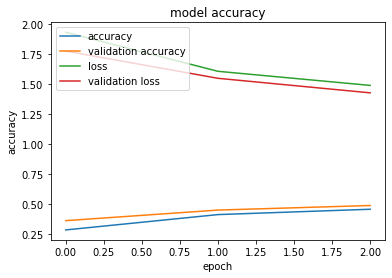

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

### Bonus Question: Program the question 2 using the saved model(.h5 model)

In [10]:
loaded_model = keras.models.load_model('abcd.h5')
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = loaded_model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for first four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      8
2        3      9
3        4      8
Actual labels for first four images: [3 8 8 0]
